In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data = pd.read_csv('StudentsPerformance.csv')

# Understanding the data 

In [4]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
data.describe(include='O')

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


In [11]:
data.columns.to_list()

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [10]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [12]:
data['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

# Cleaning the data

In [13]:
data.isnull().sum() 

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [14]:
student = data.drop(['race/ethnicity', 'parental level of education'], axis=1)

In [15]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


In [16]:
data['Final_Score'] = (data['math score'] + data['reading score'] + data['writing score']) / 3
data['result'] = 0
data.loc[data['Final_Score'] >= 50, 'result'] = 1
data.loc[data['Final_Score'] < 50, 'result'] = 0

In [17]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Final_Score,result
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,1
1,female,group C,some college,standard,completed,69,90,88,82.333333,1
2,female,group B,master's degree,standard,none,90,95,93,92.666667,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,0
4,male,group C,some college,standard,none,76,78,75,76.333333,1
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.000000,1
996,male,group C,high school,free/reduced,none,62,55,55,57.333333,1
997,female,group C,high school,free/reduced,completed,59,71,65,65.000000,1
998,female,group D,some college,standard,completed,68,78,77,74.333333,1


# Analysis of relationship

<Axes: >

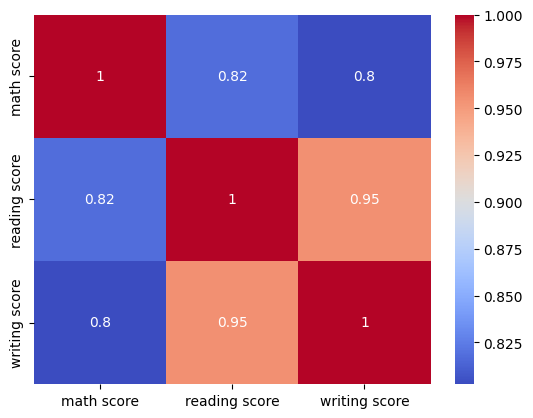

In [19]:
correlation = student.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, cmap='coolwarm')

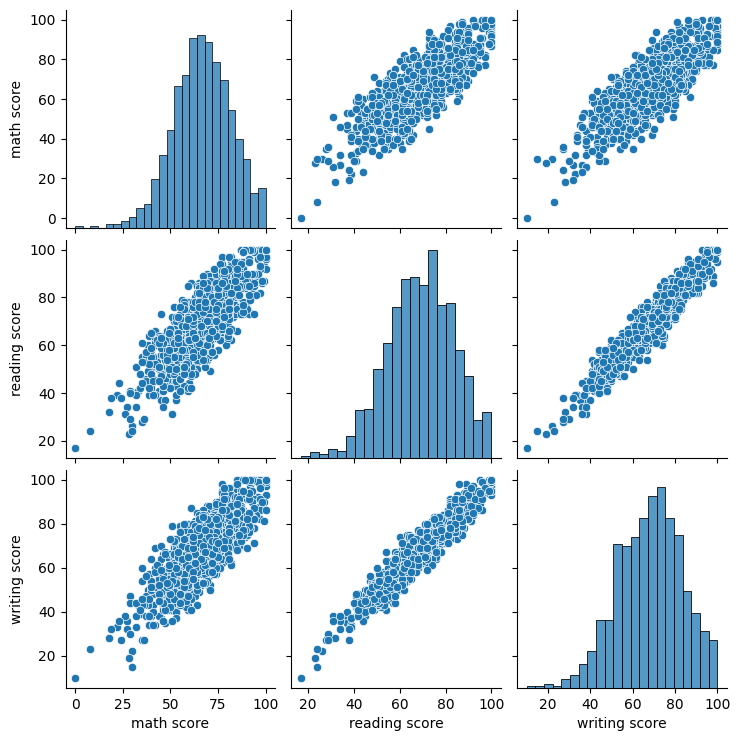

In [20]:
sns.pairplot(student)

In [21]:
student.head()

,gender,lunch,test preparation course,math score,reading score,writing score
0,female,standard,none,72,72,74
1,female,standard,completed,69,90,88
2,female,standard,none,90,95,93
3,male,free/reduced,none,47,57,44
4,male,standard,none,76,78,75


# using different plotting

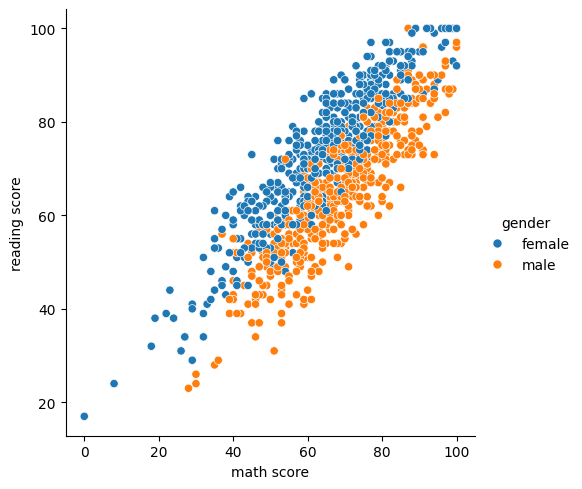

In [23]:
sns.relplot(x='math score', y='reading score',hue='gender',data=student)

<Axes: xlabel='math score', ylabel='Count'>

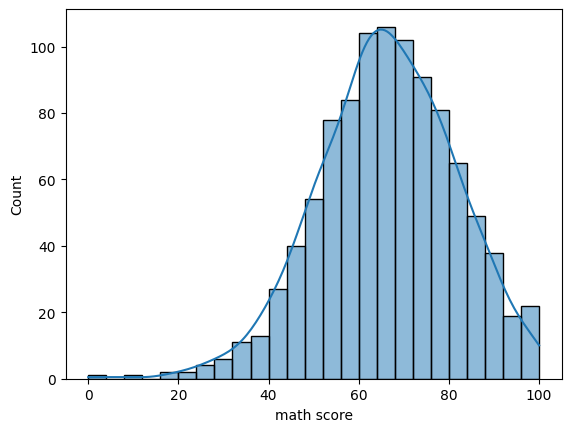

In [24]:
sns.histplot(student['math score'], kde=True)

<Axes: xlabel='writing score', ylabel='Count'>

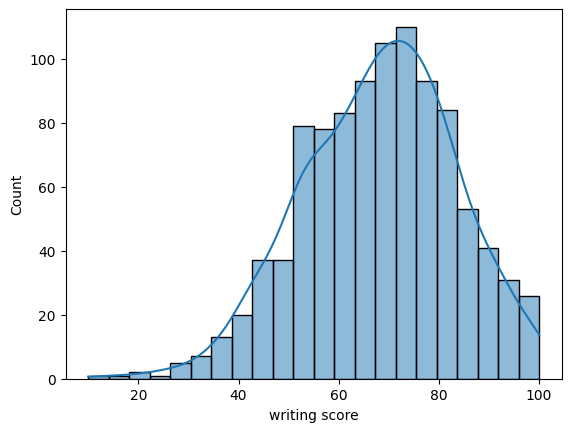

In [25]:
sns.histplot(student['writing score'], kde=True)

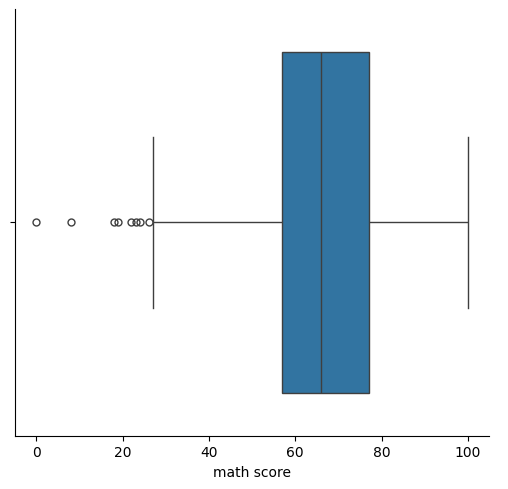

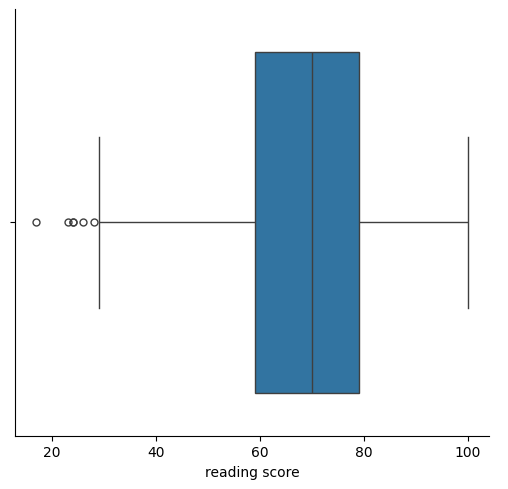

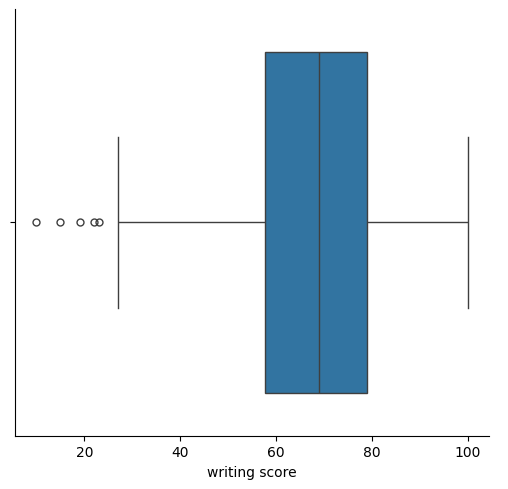

In [26]:
sns.catplot(x='math score', kind='box', data=student)
sns.catplot(x='reading score', kind='box', data=student)
sns.catplot(x='writing score', kind='box', data=student)

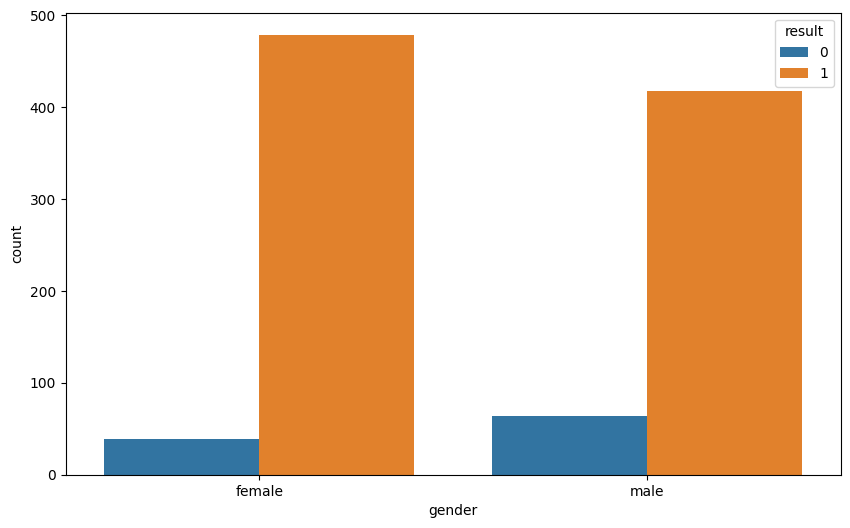

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', hue='result', data=data)
plt.show()

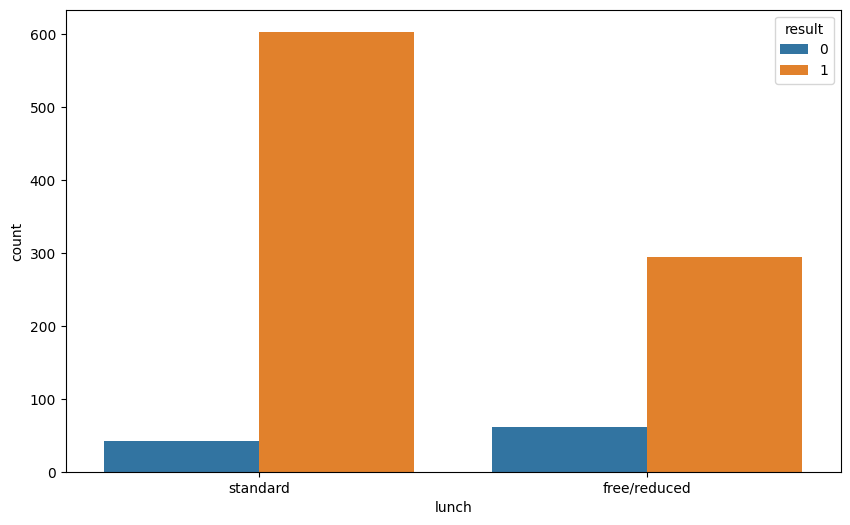

In [33]:
plt.figure(figsize=(10, 6))
sns.countplot(x='lunch', hue='result', data=data)
plt.show()

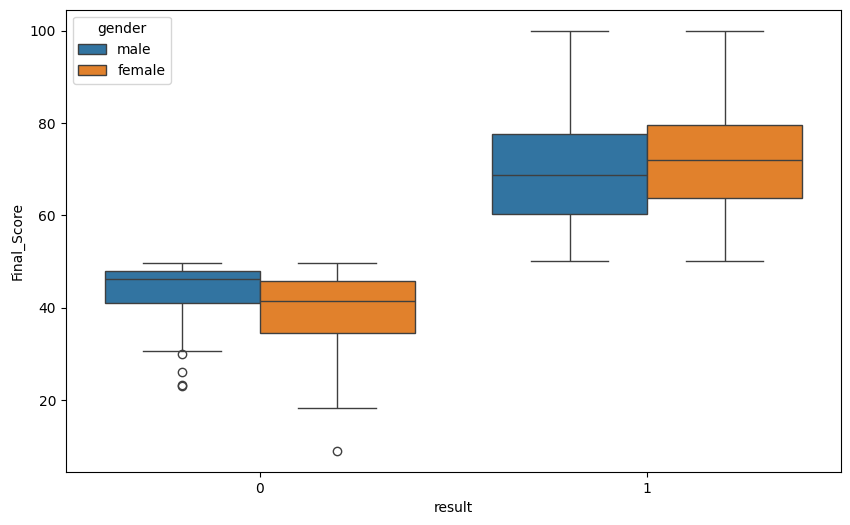

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='result', y='Final_Score', hue='gender', data=data)
plt.show()